In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [249]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor

# from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
sns.set(rc={'figure.figsize':(8,4.5)})

In [4]:
airbnb_data_full = pd.read_csv('AB_NYC_2019.csv')

In [5]:
airbnb_data_full.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
airbnb_data_full.isna().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
airbnb_data_full.duplicated().sum()
# airbnb_data_full.drop_duplicates(inplace=True)

0

In [9]:
airbnb_data = airbnb_data_full.drop(['id','host_name','last_review'], axis=1)

In [10]:
airbnb_data.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [11]:
# Missing values in percent
(airbnb_data.isna().sum() / airbnb_data.shape[0]) * 100

name                               0.032723
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

20% missing in reviews_per_month

In [12]:
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)

In [13]:
airbnb_data.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [14]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [15]:
for colname in airbnb_data.columns:
    print(f'{colname} : {len(airbnb_data[colname].unique())} unique values')

name : 47906 unique values
host_id : 37457 unique values
neighbourhood_group : 5 unique values
neighbourhood : 221 unique values
latitude : 19048 unique values
longitude : 14718 unique values
room_type : 3 unique values
price : 674 unique values
minimum_nights : 109 unique values
number_of_reviews : 394 unique values
reviews_per_month : 938 unique values
calculated_host_listings_count : 47 unique values
availability_365 : 366 unique values


Features "name", "neighbourhood_group", "neighbourhood" and "room_type" are object. 
Feature "neighbourhood_group" has 5 groups. Feature "room_type" has 3 types. Feature "name" should be dropped.

In [16]:
airbnb_data.drop(['name'], axis=1, inplace=True)

In [17]:
airbnb_data.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [18]:
# Check
# airbnb_data_full.isna().sum()

In [19]:
airbnb_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Price 0 and minimum_nights 1250 look strange

In [20]:
print(f'Shape before = {airbnb_data_full.shape}, shape now = {airbnb_data.shape}')

Shape before = (48895, 16), shape now = (48895, 12)


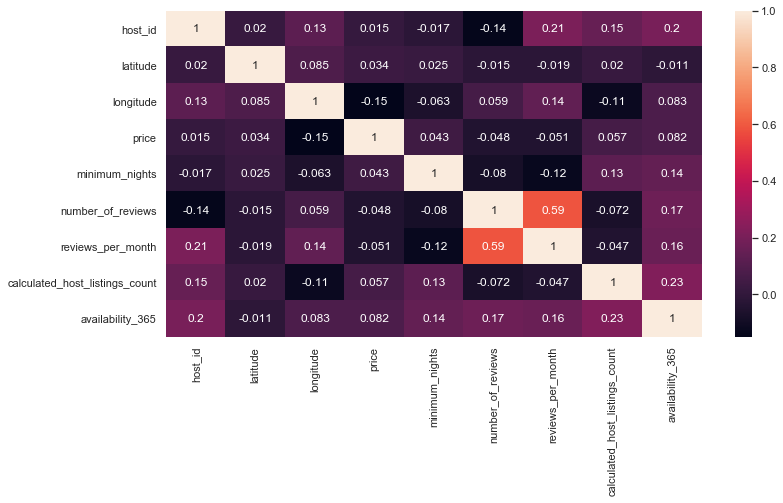

In [21]:
feature_correlation = airbnb_data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

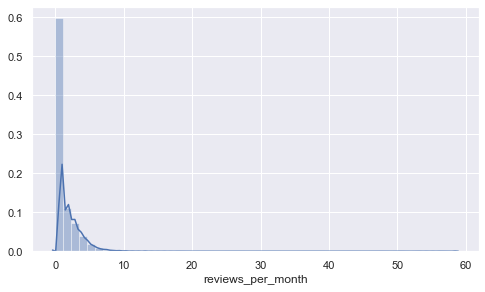

In [22]:
sns.distplot(airbnb_data.reviews_per_month)

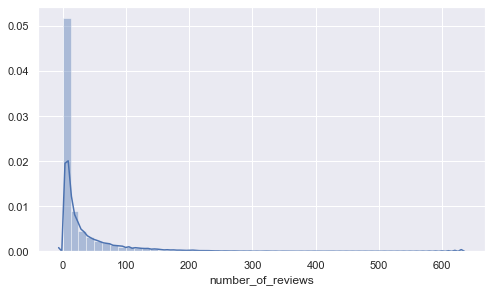

In [23]:
sns.distplot(airbnb_data.number_of_reviews)

Both grapics have abnormal distribution => Choose the kendall corr

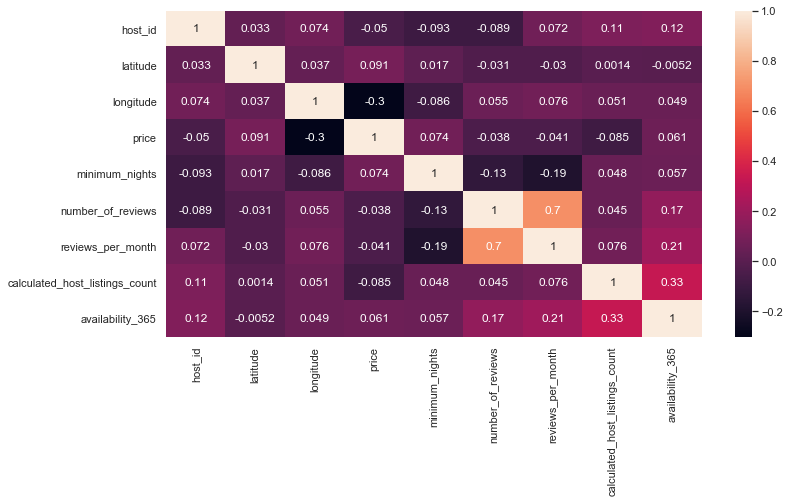

In [24]:
feature_correlation = airbnb_data.corr(method='kendall')
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

Learn the features "neighbourhood_group", "neighbourhood" and "room_type" (object). 

Text(0.5, 1.0, 'Neighbourhood Group')

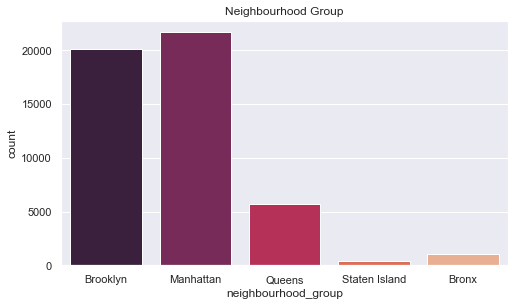

In [25]:
sns.countplot(airbnb_data['neighbourhood_group'], palette='rocket')
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

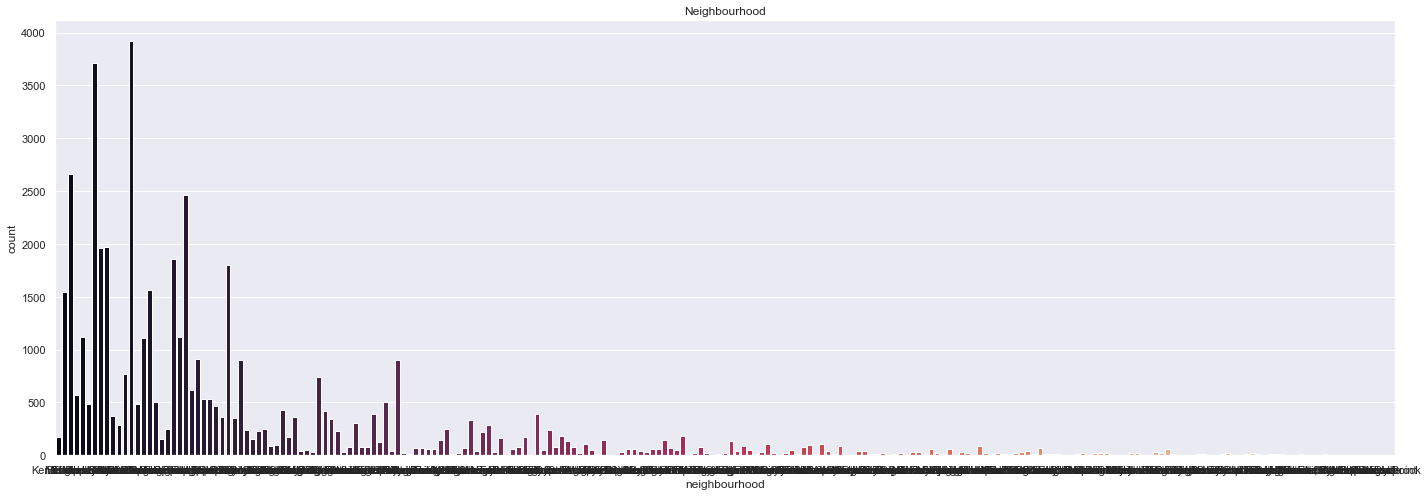

In [26]:
ax = sns.countplot(airbnb_data['neighbourhood'], palette='rocket')
fig = plt.gcf()
fig.set_size_inches(24,8)
plt.title('Neighbourhood')

Text(0.5, 1.0, 'Room type')

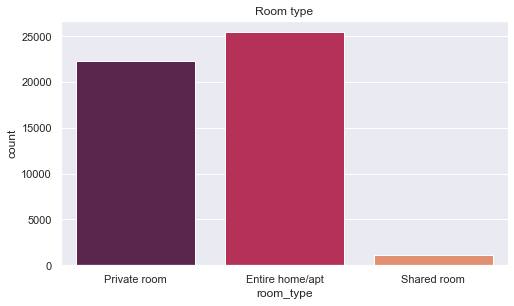

In [27]:
sns.countplot(airbnb_data['room_type'], palette="rocket")
plt.title('Room type')

In [28]:
# sns.boxplot(data=airbnb_data, x='neighbourhood_group',y='availability_365',palette='rocket')

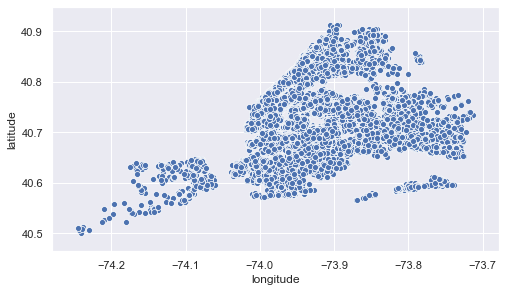

In [29]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude)
# sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood_group)

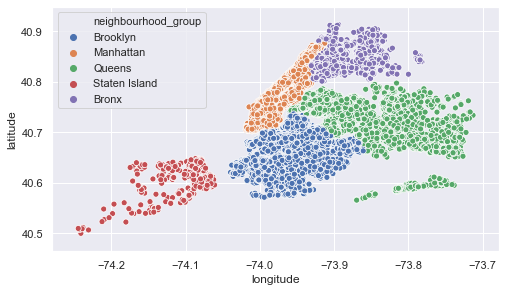

In [30]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood_group)

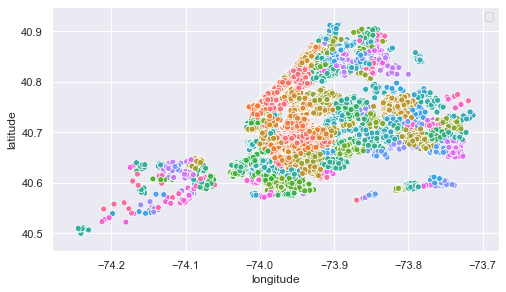

In [31]:
ax = sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood)
ax.legend([])

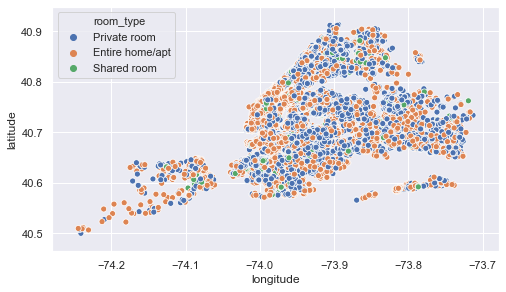

In [32]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.room_type)

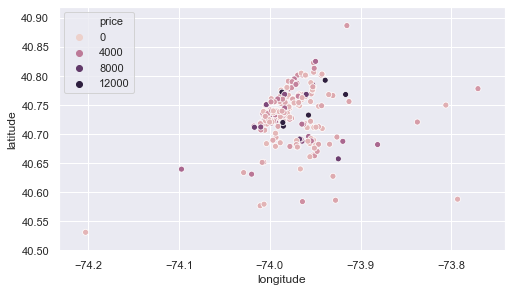

In [328]:
# airbnb_data.price.quantile(q=0.5)
airbnb_data_choosen = airbnb_data[airbnb_data.price > 1000]
sns.scatterplot(airbnb_data_choosen.longitude, airbnb_data_choosen.latitude, hue=airbnb_data.price)

In [327]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = airbnb_data.select_dtypes(include=numerics).columns

In [34]:
num_features

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

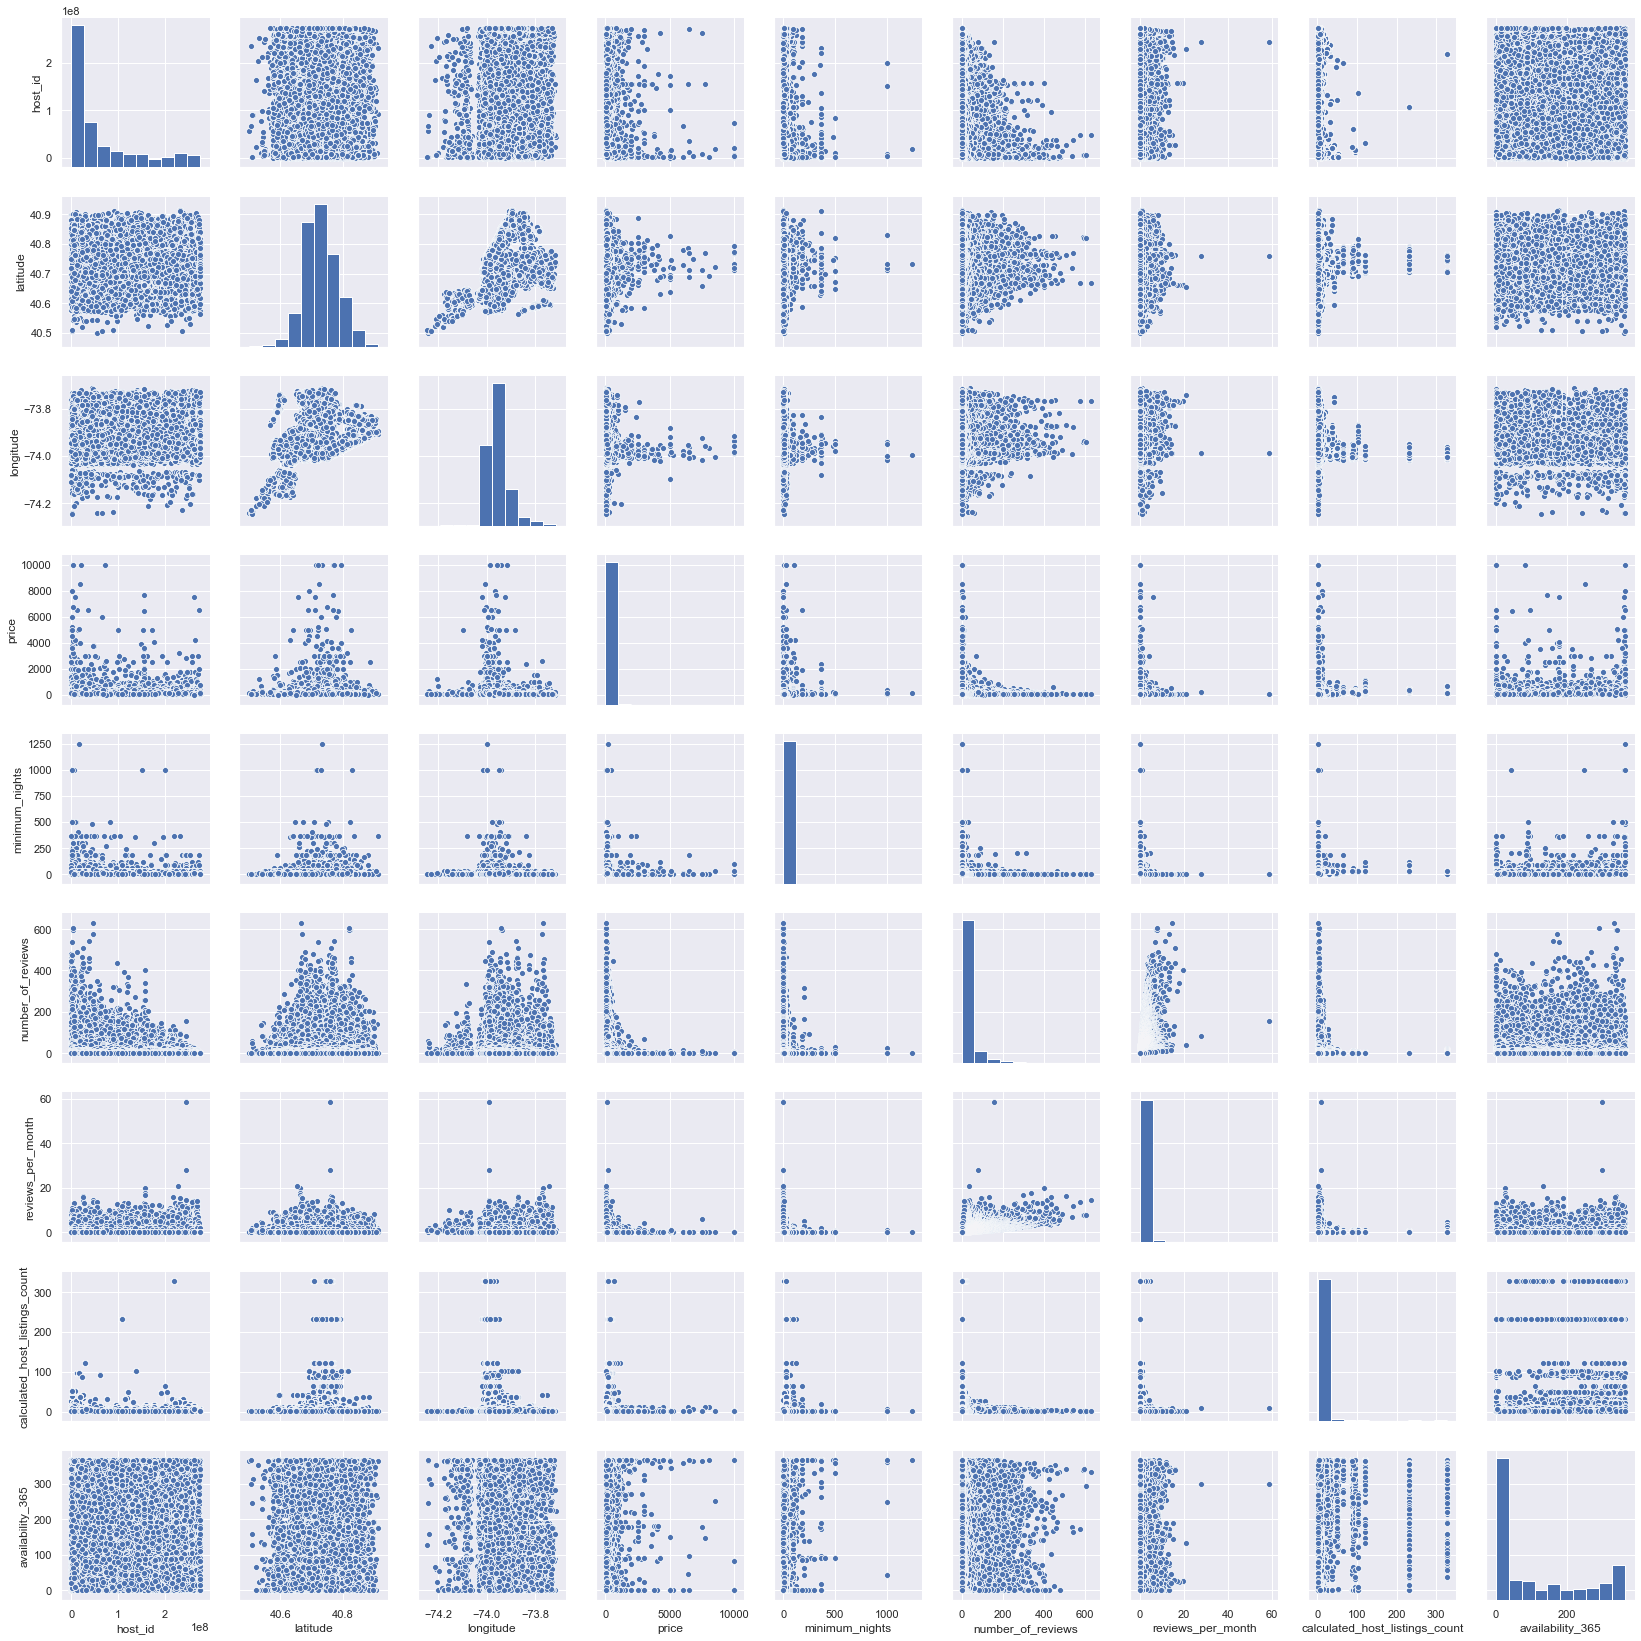

In [35]:
sns.set()
sns.pairplot(airbnb_data[num_features])

In [ ]:
# Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
#        'number_of_reviews', 'reviews_per_month',
#        'calculated_host_listings_count', 'availability_365'],
#       dtype='object')

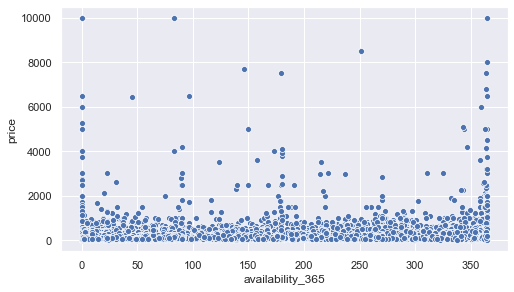

In [152]:
sns.scatterplot(airbnb_data.availability_365, airbnb_data.price)

availability_365 and host_id have low correlation

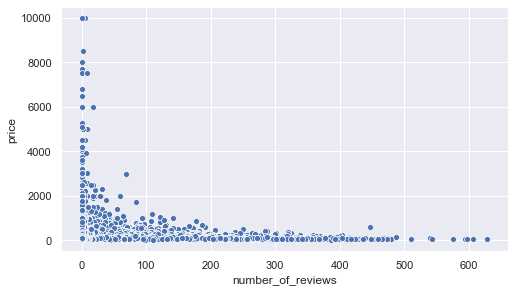

In [148]:
sns.scatterplot(airbnb_data.number_of_reviews, airbnb_data.price)

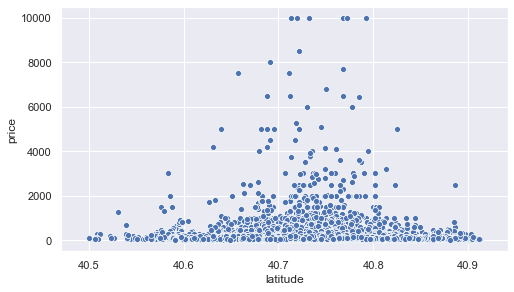

In [149]:
sns.scatterplot(airbnb_data.latitude, airbnb_data.price)

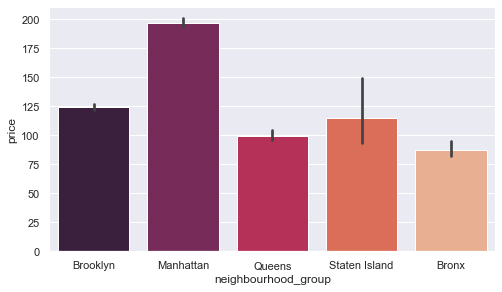

In [269]:
# "neighbourhood_group", "neighbourhood" and "room_type"
sns.barplot(x='neighbourhood_group', y='price', data=airbnb_data, palette="rocket")

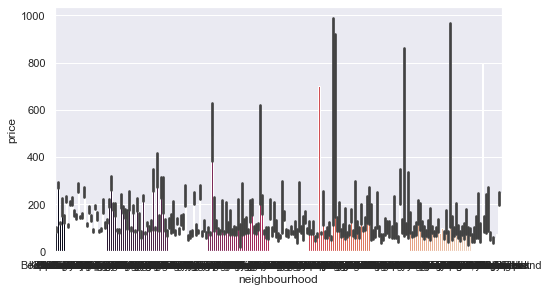

In [270]:
sns.barplot(x='neighbourhood', y='price', data=airbnb_data, palette="rocket")

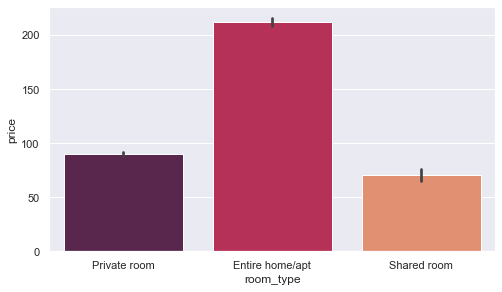

In [271]:
sns.barplot(x='room_type', y='price', data=airbnb_data, palette="rocket")

Split data to train and test before feature encoding and scaling

In [332]:
x = airbnb_data.drop(['price'], axis=1)
y = airbnb_data.price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17)

Numeric features should be normilized (max-min or standard scaler)

In [333]:
num_x_train = x_train.select_dtypes(include=numerics)
num_x_test = x_test.select_dtypes(include=numerics)

In [334]:
# MIN-MAX SCALE
# num_x_train_scaled = pd.DataFrame(minmax_scale(num_x_train))
# num_x_train_scaled.index = num_x_train.index
# num_x_train_scaled.columns = num_x_train.columns

# num_x_test_scaled = pd.DataFrame(minmax_scale(num_x_test))
# num_x_test_scaled.index = num_x_test.index
# num_x_test_scaled.columns = num_x_test.columns

# num_x_train_scaled

In [335]:
# STANDARD SCALE

std_scaler = StandardScaler()
num_x_train_scaled = pd.DataFrame(std_scaler.fit_transform(num_x_train))
num_x_train_scaled.index = num_x_train.index
num_x_train_scaled.columns = num_x_train.columns

num_x_test_scaled = pd.DataFrame(std_scaler.transform(num_x_test))
num_x_test_scaled.index = num_x_test.index
num_x_test_scaled.columns = num_x_test.columns

In [336]:
num_x_test_scaled.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2472,-0.826415,-0.259067,0.273384,-0.144909,-0.253893,-0.574171,-0.187133,1.917312
34556,-0.828731,-0.769960,-0.053305,-0.237272,-0.524460,-0.679838,-0.187133,-0.858556
34771,-0.655632,-0.781709,0.803191,1.101990,-0.501913,-0.611465,-0.187133,-0.592377
48617,2.611354,-0.052727,2.026258,-0.283453,-0.524460,-0.679838,-0.187133,0.076874
11574,-0.265150,1.193941,0.394122,-0.283453,0.557810,-0.014753,-0.126396,1.620713


Prepare categorical features

In [337]:
airbnb_data.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [338]:
airbnb_data.neighbourhood.unique().shape[0]

221

In [339]:
airbnb_data.neighbourhood_group.unique().shape[0]

5

In [340]:
airbnb_data.room_type.unique().shape[0]

3

neighbourhood -> Label Encoder;

neighbourhood_group and room_type -> One Hot Encoder

In [341]:
x_train.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
30527,176436884,Manhattan,Greenwich Village,40.73230,-73.99433,Entire home/apt,2,69,4.23,1,112
31846,95051172,Manhattan,Midtown,40.75377,-73.97302,Private room,2,0,0.00,1,0
6403,20559017,Manhattan,East Harlem,40.78644,-73.94380,Private room,30,4,0.08,9,311


One-hot encoding

In [342]:
oh_cols = ['room_type', 'neighbourhood_group']
oh_cols_train = pd.get_dummies(x_train[oh_cols], prefix=['type', 'group'])
oh_cols_test = pd.get_dummies(x_test[oh_cols], prefix=['type', 'group'])
oh_cols_train.head(3)

,type_Entire home/apt,type_Private room,type_Shared room,group_Bronx,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island
30527,1,0,0,0,0,1,0,0
31846,0,1,0,0,0,1,0,0
6403,0,1,0,0,0,1,0,0


Label Encoding

In [343]:
le_cols = ["neighbourhood"]
label_encoder = LabelEncoder()

le_cols_train = pd.DataFrame(label_encoder.fit_transform(x_train[le_cols]),
                             columns=le_cols)
le_cols_train.index = x_train.index

# In the test dataset new labels will be replaced with the most frequent value
def find_most_freq(series, column):
    return int(series[column].value_counts().index[0])
    
def fill_data_test(x_train, x_test, column, encoder, new_value):
    encoder_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    data_test_filled = pd.DataFrame(x_test[column]
        .apply(lambda name: encoder_dict.get(name, new_value)), columns=[column])
    return data_test_filled
    
le_cols_test = pd.DataFrame()
for column in le_cols:
    most_freq_label = find_most_freq(le_cols_train, column)
    column_filled = fill_data_test(le_cols_train, x_test, column, 
                                   label_encoder, most_freq_label)
    le_cols_test = pd.concat((le_cols_test, column_filled), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


??? Normalize categorical labels which was encoded by LabelEncoder
???

In [344]:
# le_std_scaler = StandardScaler()

# le_cols_train_scaled = pd.DataFrame(minmax_scale(le_cols_train))
# le_cols_train_scaled.index = le_cols_train.index
# le_cols_train_scaled.columns = le_cols_train.columns

# le_cols_test_scaled = pd.DataFrame(minmax_scale(le_cols_test))
# le_cols_test_scaled.index = le_cols_test.index
# le_cols_test_scaled.columns = le_cols_test.columns
# le_cols_test_scaled

In [345]:
# Check the shape
x_test.shape

(12224, 11)

In [346]:
le_cols_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36671 entries, 30527 to 10863
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   neighbourhood  36671 non-null  int32
dtypes: int32(1)
memory usage: 429.7 KB


In [347]:
le_cols_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12224 entries, 2472 to 42644
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   neighbourhood  12224 non-null  int64
dtypes: int64(1)
memory usage: 191.0 KB


Join numeric scaled and categorical encoded features

In [348]:
num_x_test_scaled

x_train_encoded = pd.concat((num_x_train_scaled, oh_cols_train, le_cols_train), 
                           axis=1)
x_test_encoded = pd.concat((num_x_test_scaled, oh_cols_test, le_cols_test), 
                           axis=1)

In [349]:
x_train_encoded.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,type_Entire home/apt,type_Private room,type_Shared room,group_Bronx,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,neighbourhood
30527,1.379885,0.060356,-0.914377,-0.237272,1.031303,1.949423,-0.187133,-0.006783,1,0,0,0,0,1,0,0,91
31846,0.345360,0.454495,-0.449952,-0.237272,-0.524460,-0.679838,-0.187133,-0.858556,0,1,0,0,0,1,0,0,126
6403,-0.601539,1.054239,0.186863,1.055809,-0.434271,-0.630112,0.055814,1.506636,0,1,0,0,0,1,0,0,60
23453,0.821216,0.775570,0.686376,-0.283453,0.693094,0.693842,-0.187133,-0.303382,0,1,0,0,0,0,1,0,4
45949,1.927504,0.619714,-0.235283,1.009627,-0.524460,-0.679838,9.712964,1.506636,1,0,0,0,0,1,0,0,200


In [350]:
x_test_encoded.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,type_Entire home/apt,type_Private room,type_Shared room,group_Bronx,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,neighbourhood
2472,-0.826415,-0.259067,0.273384,-0.144909,-0.253893,-0.574171,-0.187133,1.917312,0,1,0,0,1,0,0,0,212
34556,-0.828731,-0.769960,-0.053305,-0.237272,-0.524460,-0.679838,-0.187133,-0.858556,0,1,0,0,1,0,0,0,12
34771,-0.655632,-0.781709,0.803191,1.101990,-0.501913,-0.611465,-0.187133,-0.592377,0,1,0,0,1,0,0,0,27
48617,2.611354,-0.052727,2.026258,-0.283453,-0.524460,-0.679838,-0.187133,0.076874,0,1,0,0,0,0,1,0,162
11574,-0.265150,1.193941,0.394122,-0.283453,0.557810,-0.014753,-0.126396,1.620713,1,0,0,0,0,1,0,0,60


Try different models

In [351]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [352]:
def evaluate(y_true, y_predicted):
    mae = metrics.mean_absolute_error(y_true, y_predicted)
    mse = metrics.mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_predicted))
    r2_square = metrics.r2_score(y_true, y_predicted)
    return mae, mse, rmse, r2_square

def predict(model, x_train, y_train, x_test, parameters=None):
    if parameters:
        predict_model = model(**parameters)
    else:
        predict_model = model()
    predict_model.fit(x_train, y_train)
    y_pred = predict_model.predict(x_test)
    return y_pred

Simple learn with several models

In [353]:
df_scores = pd.DataFrame(columns=['model', 'mae', 'mse', 'rmse', 'r2_square'])
list_of_models = [LinearRegression, RANSACRegressor, Ridge, Lasso,
                  DecisionTreeRegressor, GradientBoostingRegressor, RandomForestRegressor]
# ElasticNet, 

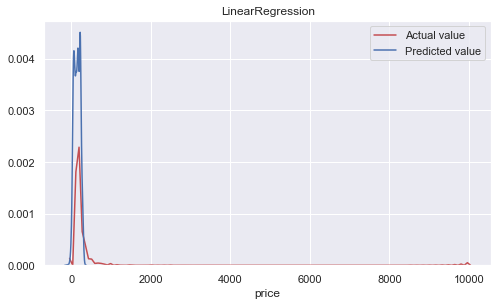

LinearRegression finished


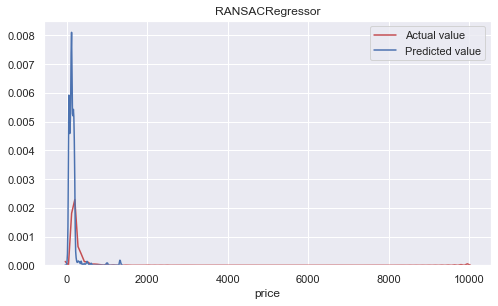

RANSACRegressor finished


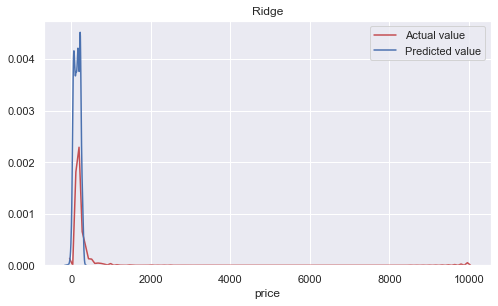

Ridge finished


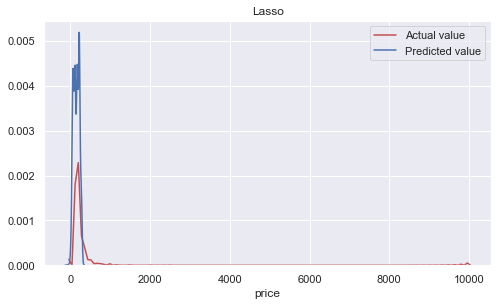

Lasso finished


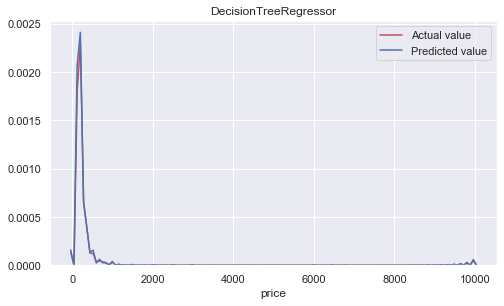

DecisionTreeRegressor finished


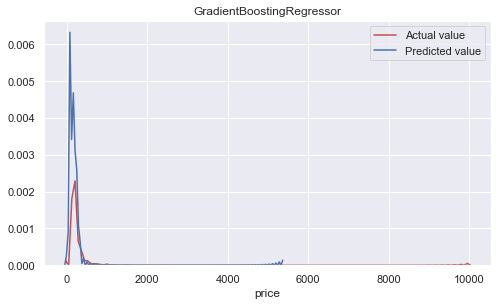

GradientBoostingRegressor finished


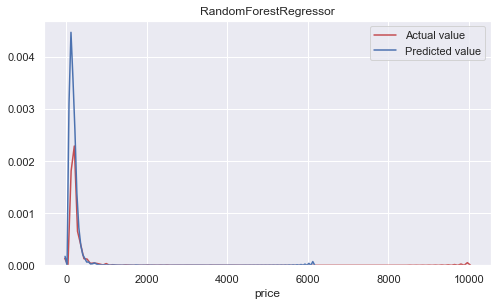

RandomForestRegressor finished


In [354]:
for model in list_of_models:
    y_pred = predict(model, x_train_encoded, y_train, x_test_encoded)
    results_append = pd.DataFrame(data=[[model.__name__, *evaluate(y_test, y_pred)]], 
                                 columns=df_scores.columns)
    df_scores = df_scores.append(results_append, ignore_index = True)
    ax = sns.distplot(y_test, hist=False, color='r', label='Actual value')
    sns.distplot(y_pred, hist=False, color='b', label='Predicted value', ax=ax)
    ax.set(title=model.__name__)
    plt.show()
    print(f'{model.__name__} finished')

In [355]:
df_scores

,model,mae,mse,rmse,r2_square
0,LinearRegression,73.170154,50085.077741,223.796957,0.096686
1,RANSACRegressor,81.001573,63825.406603,252.636907,-0.151128
2,Ridge,73.167844,50085.201181,223.797232,0.096684
3,Lasso,72.701688,50219.965244,224.098115,0.094254
4,DecisionTreeRegressor,87.239202,109668.229058,331.161938,-0.977930
5,GradientBoostingRegressor,66.316595,48847.084394,221.013765,0.119014
6,RandomForestRegressor,65.176381,49693.685078,222.920804,0.103745


It seems that price should be normilize

Trying to increase the prediction

In [356]:
from scipy import stats
from scipy.stats import norm, skew


 mu = 153.47 and sigma = 241.69



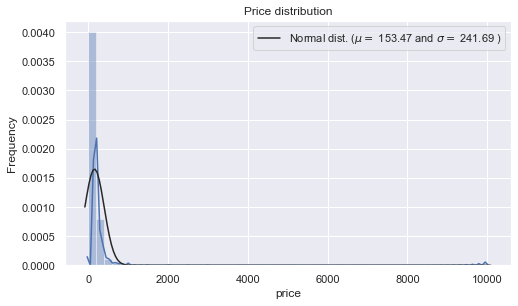

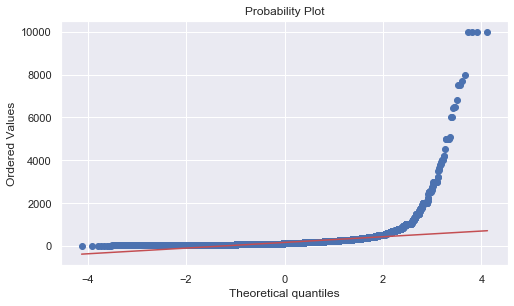

In [357]:
sns.distplot(y_train, fit=norm)

mu, sigma = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show() 

Learning the price distribution

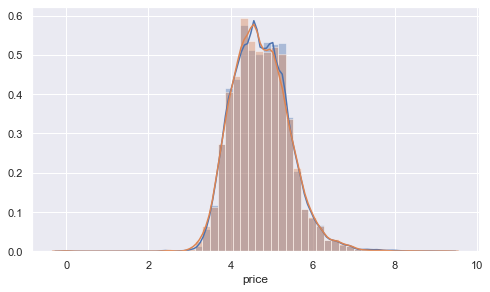

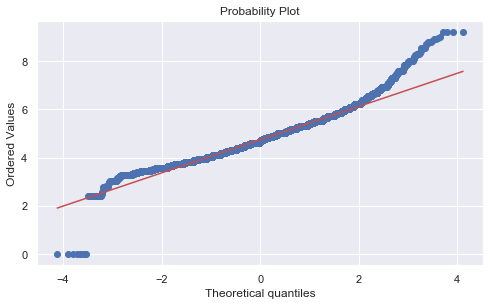

In [360]:
# y -> log(1 + y)
y_train_norm = np.log1p(y_train)
y_test_norm = np.log1p(y_test)

sns.distplot(y_train_norm)
sns.distplot(y_test_norm)

fig = plt.figure()
res = stats.probplot(y_train_norm, plot=plt)
plt.show() 

In [128]:
# def cross_val(model, x, y):
#     pred = cross_val_score(model(), x, y, cv=5)
#     return pred.mean()

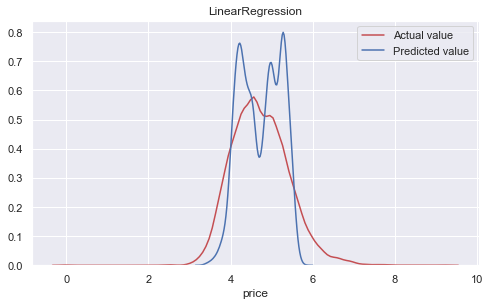

LinearRegression finished


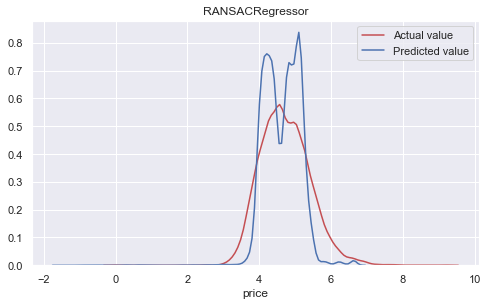

RANSACRegressor finished


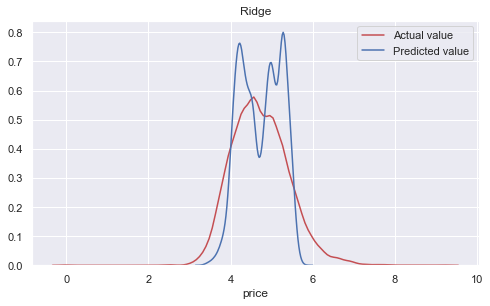

Ridge finished


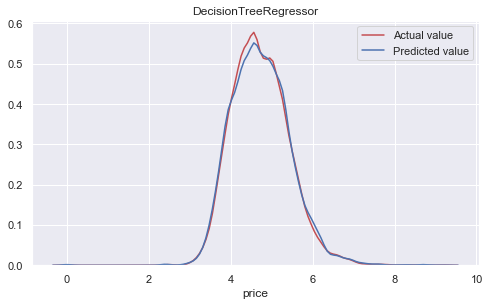

DecisionTreeRegressor finished


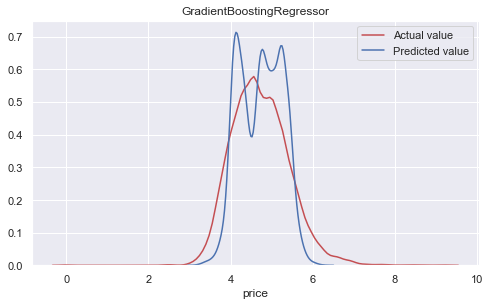

GradientBoostingRegressor finished


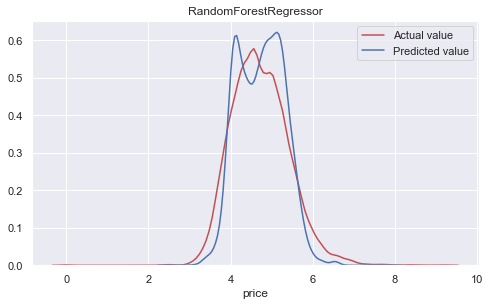

RandomForestRegressor finished


In [361]:
df_scores = pd.DataFrame(columns=['model', 'mae', 'mse', 'rmse', 'r2_square'])
# Choosing the top models
list_of_models = [LinearRegression, RANSACRegressor, Ridge, DecisionTreeRegressor, 
                  GradientBoostingRegressor, RandomForestRegressor]

for model in list_of_models:
    y_pred_norm = predict(model, x_train_encoded, y_train_norm, x_test_encoded)
    results_append = pd.DataFrame(data=[[model.__name__, *evaluate(y_test_norm, y_pred_norm)]], 
                                 columns=df_scores.columns)
    
    ax = sns.distplot(y_test_norm, hist=False, color='r', label='Actual value')
    sns.distplot(y_pred_norm, hist=False, color='b', label='Predicted value', ax=ax)
    ax.set(title=model.__name__)
    plt.show()
    
    df_scores = df_scores.append(results_append, ignore_index = True)
    print(f'{model.__name__} finished')

In [362]:
df_scores

,model,mae,mse,rmse,r2_square
0,LinearRegression,0.360145,0.244025,0.493989,0.493830
1,RANSACRegressor,0.387831,0.315647,0.561825,0.345267
2,Ridge,0.360149,0.244027,0.493991,0.493825
3,DecisionTreeRegressor,0.431888,0.378277,0.615042,0.215357
4,GradientBoostingRegressor,0.321420,0.198254,0.445257,0.588771
5,RandomForestRegressor,0.305860,0.184887,0.429985,0.616496


Again but with choosen features only

In [365]:
num_x_train_scaled.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
30527,1.379885,0.060356,-0.914377,-0.237272,1.031303,1.949423,-0.187133,-0.006783
31846,0.345360,0.454495,-0.449952,-0.237272,-0.524460,-0.679838,-0.187133,-0.858556
6403,-0.601539,1.054239,0.186863,1.055809,-0.434271,-0.630112,0.055814,1.506636
23453,0.821216,0.775570,0.686376,-0.283453,0.693094,0.693842,-0.187133,-0.303382
45949,1.927504,0.619714,-0.235283,1.009627,-0.524460,-0.679838,9.712964,1.506636


In [366]:
# x_train_choosen = pd.concat((num_x_train_scaled, oh_cols_train, le_cols_train), 
#                            axis=1)
# x_test_choosen = pd.concat((num_x_test_scaled, oh_cols_test, le_cols_test), 
#                            axis=1)

In [367]:
def compare_models(x_train, y_train, x_test, y_test, models, parameters=None, show=True):
    df_scores = pd.DataFrame(columns=['model', 'mae', 'mse', 'rmse', 'r2_square'])
    for model in models:
        y_pred = predict(model, x_train, y_train, x_test, parameters=parameters)
        results_append = pd.DataFrame(data=[[model.__name__, *evaluate(y_test, y_pred)]], 
                                     columns=df_scores.columns)
        if show:
            ax = sns.distplot(y_test, hist=False, color='r', label='Actual value')
            sns.distplot(y_pred, hist=False, color='b', label='Predicted value', ax=ax)
            ax.set(title=model.__name__)
            plt.show()

        df_scores = df_scores.append(results_append, ignore_index = True)
        print(f'{model.__name__} finished')
        
    return df_scores

In [368]:
x_train_encoded.columns

Index(['host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'type_Entire home/apt', 'type_Private room', 'type_Shared room',
       'group_Bronx', 'group_Brooklyn', 'group_Manhattan', 'group_Queens',
       'group_Staten Island', 'neighbourhood'],
      dtype='object')

In [369]:
cols_drop = ['neighbourhood']
cols_choosen = ['latitude', 'minimum_nights', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']
x_train_choosen = x_train_encoded.drop(cols_drop, axis=1)
# x_train_choosen = x_train_encoded[cols_choosen]
y_train_choosen = y_train_norm
x_test_choosen = x_test_encoded.drop(cols_drop, axis=1)
# x_test_choosen = x_test_encoded[cols_choosen]
y_test_choosen = y_test_norm

In [370]:
x_train_choosen.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,type_Entire home/apt,type_Private room,type_Shared room,group_Bronx,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island
30527,1.379885,0.060356,-0.914377,-0.237272,1.031303,1.949423,-0.187133,-0.006783,1,0,0,0,0,1,0,0
31846,0.345360,0.454495,-0.449952,-0.237272,-0.524460,-0.679838,-0.187133,-0.858556,0,1,0,0,0,1,0,0
6403,-0.601539,1.054239,0.186863,1.055809,-0.434271,-0.630112,0.055814,1.506636,0,1,0,0,0,1,0,0
23453,0.821216,0.775570,0.686376,-0.283453,0.693094,0.693842,-0.187133,-0.303382,0,1,0,0,0,0,1,0
45949,1.927504,0.619714,-0.235283,1.009627,-0.524460,-0.679838,9.712964,1.506636,1,0,0,0,0,1,0,0


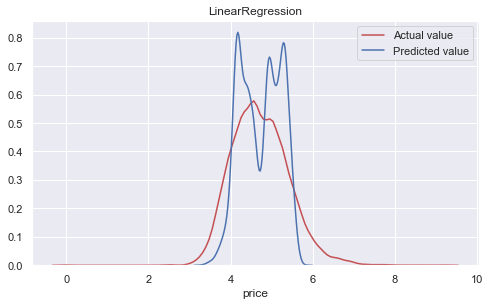

LinearRegression finished


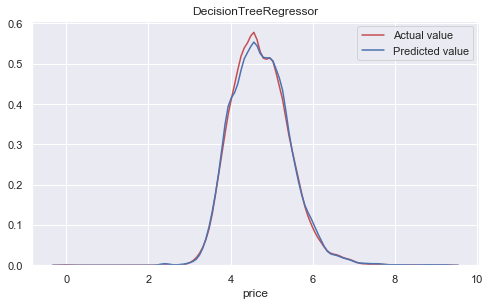

DecisionTreeRegressor finished


In [ ]:
list_of_models = [LinearRegression, DecisionTreeRegressor, 
                  GradientBoostingRegressor, RandomForestRegressor]
df_scores = compare_models(x_train_choosen, y_train_choosen, 
                           x_test_choosen, y_test_choosen, models=list_of_models)

In [ ]:
df_scores

In [331]:
import category_encoders as ce

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
# estimator = RandomForestRegressor()
# param_grid = { 
#         "n_estimators"      : [85],
# #         "max_samples": None,
# #         "min_samples_leaf": 1,
# #         "max_features"      : ["auto", "sqrt", "log2"],
#          "min_samples_split" : [8],
# #         "bootstrap": [True, False],
#         }

# grid = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1, cv=5, verbose=2)

# grid.fit(x_train, y_train)

In [ ]:
# grid.best_params_

In [ ]:
# grid.best_score_

In [ ]:
# param_grid = { 
# #         "n_estimators"      : [50, 85, 100],
# #         "max_samples": None,
# #         "min_samples_leaf": 1,
# #         "max_features"      : ["auto", "sqrt", "log2"],
# #         "min_samples_split" : [2, 4, 8],
#         "max_depth": range(8, 15),
#         "min_samples_leaf": [0.0001, 0.001, 0.01, 1, 10]
# #         "bootstrap": [True, False],
#         }

# grid = GridSearchCV(decision_tree_model, 
#                     param_grid,
#                     scoring='r2',
#                     n_jobs=-1, 
#                     cv=5)

# grid.fit(x_train, y_train)

In [ ]:
# grid.best_score_

In [ ]:
# grid.best_params_

In [ ]:
# decision_tree_model = DecisionTreeRegressor(**grid.best_params_)
# decision_tree_model.fit(x_train, y_train)
# y_pred = grid.best_estimator_.predict(x_test)
# print(f'R2 score = {r2_score(y_test, y_pred)} \n' 
#       f'MSE = {mean_squared_error(y_test, y_pred)}')

In [ ]:
# xgb_model = GradientBoostingRegressor()
# xgb_model.fit(x_train, y_train)
# y_pred = xgb_model.predict(x_test)
# print(f'R2 score = {r2_score(y_test, y_pred)} \n' 
#       f'MSE = {mean_squared_error(y_test, y_pred)}')